## Readme

In this project, we explored breast cancer embeddings derived from medical images and combined them with two risk models. Our hypothesis was that integrating these embeddings with the risk models would enhance predictive performance with Logistic Regression. Additionally, we examined how this approach might reveal potential biases within the models.

In [1]:
import pandas as pd

In [2]:
df_mag = pd.read_csv(r"/fsx1/emory-mammo/tables/filtered_magview_reduced.csv")
df_meta = pd.read_csv(r"/fsx1/emory-mammo/tables/filtered_metadata_reduced.csv")


/tmp/ipykernel_35842/323923957.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mag = pd.read_csv(r"/fsx1/emory-mammo/tables/filtered_magview_reduced.csv")
/tmp/ipykernel_35842/323923957.py:2: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(r"/fsx1/emory-mammo/tables/filtered_metadata_reduced.csv")


In [3]:
a =df_mag.head(1)

In [4]:
a

,empi_anon,acc_anon,desc,numfind,side,asses,tissueden,bside,type,GENDER_DESC,...,procdate_anon,cohort_num,path_severity,total_L_find,total_R_find,first_3_zip,mass,asymmetry,arch_distortion,calcification
0,39849800,1734930095489167,MG Diagnostic Mammo Bilateral,1,L,B,3.0,NaN,NaN,Female,...,NaN,1,NaN,1.0,1.0,300.0,0,0,0,0


# RISK Table

In [5]:
df_risk = pd.read_csv(r"/fsx1/emory-mammo/tables/RiskHist_anon.csv")

/tmp/ipykernel_35842/2817487874.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_risk = pd.read_csv(r"/fsx1/emory-mammo/tables/RiskHist_anon.csv")


In [6]:
df_risk

,tissueden,ftissue,NCILIFE,IBISLIFE,IBISBRCA1,IBISBRCA2,IBIS10,IBISPOP10,IBISPOPL,NCI5,IBIS_TD1,IBIS_TD2,IBIS_TD3,IBIS_TD4,empi_anon,acc_anon
0,3,3,5.4,7.6,0.1,0.1,3.3,3.6,8.4,1.3,7.6,7.6,7.6,7.6,92684858,6676599686663597
1,3,3,12.5,20.8,0.1,0.2,2.7,1.6,12.9,0.7,20.8,20.8,20.8,20.8,95164898,3952264061548051
2,4,4,3.3,11.1,0.1,0.1,5.6,3.5,7.0,1.3,11.1,11.1,11.1,11.1,16526217,8602743789728877
3,4,4,17.3,0.0,0.1,0.1,1.4,1.6,12.9,1.0,0.0,0.0,0.0,0.0,96546955,5244324130156224
4,2,2,8.8,9.5,0.1,0.1,2.4,2.9,11.0,1.1,9.5,9.5,9.5,9.5,93813690,5909097418471835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230345,2.0,2.0,6.9,9.8,0.1,0.1,0.7,1.0,13.2,0.2,9.8,9.8,9.8,9.8,20412979,8776481795334155
230346,3.0,3.0,4.0,6.2,0.1,0.1,3.1,3.5,7.0,1.1,2.7,4.1,6.2,9.3,92736425,5390022422607612
230347,3.0,3.0,5.1,6.4,0.1,0.1,4.0,3.5,5.5,1.7,2.8,4.2,6.4,9.6,98873991,9741027078731600
230348,3.0,3.0,17.0,22.4,0.2,0.4,3.5,1.9,12.7,1.2,10.3,15.3,22.4,32.1,15304189,1456303813746813


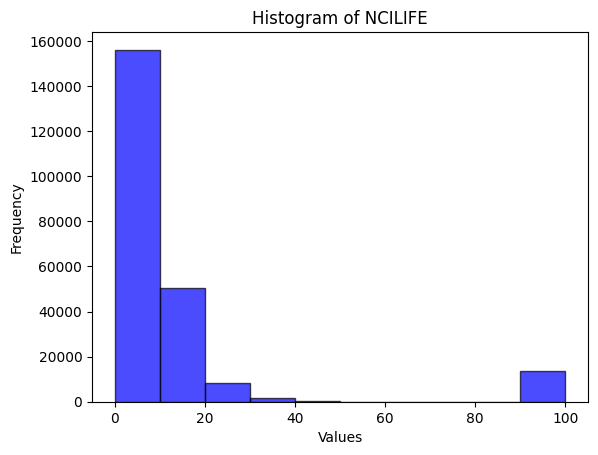

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

# Sample data



# Plot histogram
df_risk['IBISLIFE'].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')

# Customize the plot
plt.title('Histogram of NCILIFE')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
def scale_values(x):
    if x > 50:
        return 1
    else:
        return x / 50

# Scaling

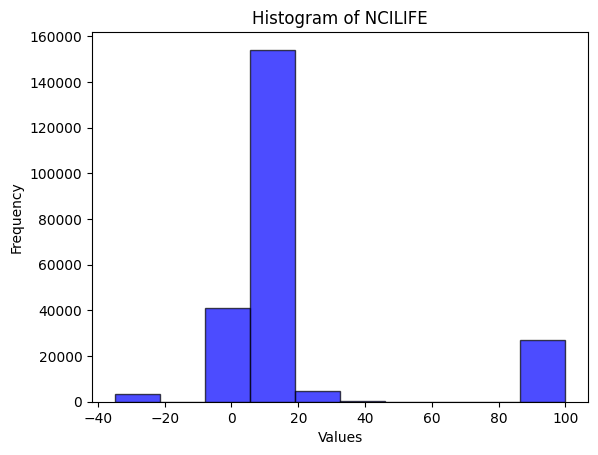

In [19]:
df_risk['scaled_IBISLIFE'] = df_risk['IBISLIFE'].apply(scale_values)
# df_risk.plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')

# Customize the plot
df_risk['NCILIFE'].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of NCILIFE')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [10]:
df_risk

,tissueden,ftissue,NCILIFE,IBISLIFE,IBISBRCA1,IBISBRCA2,IBIS10,IBISPOP10,IBISPOPL,NCI5,IBIS_TD1,IBIS_TD2,IBIS_TD3,IBIS_TD4,empi_anon,acc_anon,scaled_IBISLIFE
0,3,3,5.4,7.6,0.1,0.1,3.3,3.6,8.4,1.3,7.6,7.6,7.6,7.6,92684858,6676599686663597,0.152
1,3,3,12.5,20.8,0.1,0.2,2.7,1.6,12.9,0.7,20.8,20.8,20.8,20.8,95164898,3952264061548051,0.416
2,4,4,3.3,11.1,0.1,0.1,5.6,3.5,7.0,1.3,11.1,11.1,11.1,11.1,16526217,8602743789728877,0.222
3,4,4,17.3,0.0,0.1,0.1,1.4,1.6,12.9,1.0,0.0,0.0,0.0,0.0,96546955,5244324130156224,0.000
4,2,2,8.8,9.5,0.1,0.1,2.4,2.9,11.0,1.1,9.5,9.5,9.5,9.5,93813690,5909097418471835,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230345,2.0,2.0,6.9,9.8,0.1,0.1,0.7,1.0,13.2,0.2,9.8,9.8,9.8,9.8,20412979,8776481795334155,0.196
230346,3.0,3.0,4.0,6.2,0.1,0.1,3.1,3.5,7.0,1.1,2.7,4.1,6.2,9.3,92736425,5390022422607612,0.124
230347,3.0,3.0,5.1,6.4,0.1,0.1,4.0,3.5,5.5,1.7,2.8,4.2,6.4,9.6,98873991,9741027078731600,0.128
230348,3.0,3.0,17.0,22.4,0.2,0.4,3.5,1.9,12.7,1.2,10.3,15.3,22.4,32.1,15304189,1456303813746813,0.448


In [11]:
df1 = pd.read_csv('embed_demo_result_complete.csv')
df2 =pd.read_csv('session_df_all.csv')

In [12]:
df_result = pd.merge(df1, df2, on='png_path', how='inner')
df_embed_result_empi_anon_not_png_path = df_result[['scores', 'session_label_x', 'empi_anon']]

In [13]:
df_embed_result_empi_anon_not_png_path

,scores,session_label_x,empi_anon
0,0.426943,1,10010842
1,0.469375,1,10010842
2,0.288646,1,10044241
3,0.307292,1,10044241
4,0.309218,1,10044241
...,...,...,...
19945,0.391145,0,99986224
19946,0.346059,0,99986224
19947,0.319508,0,99986224
19948,0.371289,0,99986224


In [14]:
df_risk

,tissueden,ftissue,NCILIFE,IBISLIFE,IBISBRCA1,IBISBRCA2,IBIS10,IBISPOP10,IBISPOPL,NCI5,IBIS_TD1,IBIS_TD2,IBIS_TD3,IBIS_TD4,empi_anon,acc_anon,scaled_IBISLIFE
0,3,3,5.4,7.6,0.1,0.1,3.3,3.6,8.4,1.3,7.6,7.6,7.6,7.6,92684858,6676599686663597,0.152
1,3,3,12.5,20.8,0.1,0.2,2.7,1.6,12.9,0.7,20.8,20.8,20.8,20.8,95164898,3952264061548051,0.416
2,4,4,3.3,11.1,0.1,0.1,5.6,3.5,7.0,1.3,11.1,11.1,11.1,11.1,16526217,8602743789728877,0.222
3,4,4,17.3,0.0,0.1,0.1,1.4,1.6,12.9,1.0,0.0,0.0,0.0,0.0,96546955,5244324130156224,0.000
4,2,2,8.8,9.5,0.1,0.1,2.4,2.9,11.0,1.1,9.5,9.5,9.5,9.5,93813690,5909097418471835,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230345,2.0,2.0,6.9,9.8,0.1,0.1,0.7,1.0,13.2,0.2,9.8,9.8,9.8,9.8,20412979,8776481795334155,0.196
230346,3.0,3.0,4.0,6.2,0.1,0.1,3.1,3.5,7.0,1.1,2.7,4.1,6.2,9.3,92736425,5390022422607612,0.124
230347,3.0,3.0,5.1,6.4,0.1,0.1,4.0,3.5,5.5,1.7,2.8,4.2,6.4,9.6,98873991,9741027078731600,0.128
230348,3.0,3.0,17.0,22.4,0.2,0.4,3.5,1.9,12.7,1.2,10.3,15.3,22.4,32.1,15304189,1456303813746813,0.448


In [15]:
df_risk_and_embeds = pd.merge(df_embed_result_empi_anon_not_png_path, df_risk, on='empi_anon', how='inner')

In [22]:
def scale_values_NCILIFE(x):
    if x > 50:
        return 1
    elif x<0:
        return 0
    else:
        return x / 50

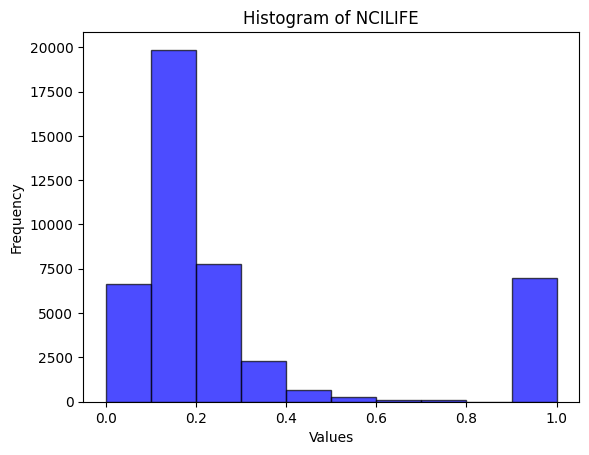

In [25]:
df_risk_and_embeds['scaled_NCILIFE'] = df_risk_and_embeds['NCILIFE'].apply(scale_values_NCILIFE)
# df_risk.plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')

# Customize the plot
df_risk_and_embeds['scaled_NCILIFE'].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of NCILIFE')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
IBISPOP10

In [16]:
df_risk_and_embeds

,scores,session_label_x,empi_anon,tissueden,ftissue,NCILIFE,IBISLIFE,IBISBRCA1,IBISBRCA2,IBIS10,IBISPOP10,IBISPOPL,NCI5,IBIS_TD1,IBIS_TD2,IBIS_TD3,IBIS_TD4,acc_anon,scaled_IBISLIFE
0,0.288646,1,10044241,2,2,5.4,5.1,0.1,0.1,3.0,3.5,5.9,1.7,5.1,5.1,5.1,5.1,3993319361430024,0.102
1,0.307292,1,10044241,2,2,5.4,5.1,0.1,0.1,3.0,3.5,5.9,1.7,5.1,5.1,5.1,5.1,3993319361430024,0.102
2,0.309218,1,10044241,2,2,5.4,5.1,0.1,0.1,3.0,3.5,5.9,1.7,5.1,5.1,5.1,5.1,3993319361430024,0.102
3,0.465732,1,10140506,3,3,100.0,100.0,0.1,0.1,100.0,3.5,7.0,100.0,100.0,100.0,100.0,100.0,2923007053152234,1.000
4,0.465732,1,10140506,3,3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1917449303397642,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44654,0.371289,0,99986224,1,1,35.1,15.1,0.4,0.6,15.1,2.9,2.9,22.0,15.1,15.1,15.1,15.1,8848125344172315,0.302
44655,0.371289,0,99986224,1,1,39.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5197479231955987,0.000
44656,0.323685,0,99986224,1,1,37.3,16.5,0.4,0.7,16.5,3.2,3.2,22.3,16.5,16.5,16.5,16.5,8107409307566891,0.330
44657,0.323685,0,99986224,1,1,35.1,15.1,0.4,0.6,15.1,2.9,2.9,22.0,15.1,15.1,15.1,15.1,8848125344172315,0.302


# Logistic regression on IBISLIFE Risk Model data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_risk_and_embeds is your DataFrame
df = df_risk_and_embeds

# Features and target
X = df[['scores', 'scaled_IBISLIFE']]
y = df['session_label_x']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.46      0.51      6101
           1       0.61      0.72      0.66      7297

    accuracy                           0.60     13398
   macro avg       0.60      0.59      0.59     13398
weighted avg       0.60      0.60      0.59     13398



# Logistic regression on IBISLIFE Risk Model data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_risk_and_embeds is your DataFrame
df = df_risk_and_embeds

# Features and target
X = df[['scores', 'scaled_NCILIFE']]
y = df['session_label_x']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54      6101
           1       0.63      0.69      0.66      7297

    accuracy                           0.61     13398
   macro avg       0.60      0.60      0.60     13398
weighted avg       0.60      0.61      0.60     13398

